# Hodgkin Huxley Simulation & Action Potential Concepts
We're going to run some simulations of a "neuron" behaving  according to the Hodgkin-Huxley equations. Having completed this part, you should be able to answer the following question:

How do the various terms in the Hodgkin-Huxley model contribute to the system's behaviour?

Code should be readable and commented. For all plots, make sure to label your axes.


## Differential equations background

At the most basic level, a differential equation relates the value of a function to its derivatives. In sciences that deal with complex dynamical systems (e.g. neuroscience), they are a convenient tool to describe the behaviour of a system in terms of how its constituent parts change over time -- it is often easier to specify a series of time-derivatives than to write down an equation that immediately gives the state of the system at any given time.

For concreteness, let's say you have some function $f(t)$. A differential equation looks something like $\frac{df(t)}{dt} = g(f(t))$, where the derivative of a function is related to the function itself through another function $g$. One fundamental example is $\frac{df(t)}{dt} = f(t)$ (the derivative of $f$ is equal to $f$). When we have a differential equation such as this, we often would like to find its **solution**; the solution to a differential equation is the value of $f(t)$ for a set of times that we might be interested in.

This can be provided in two ways. For some differential equations there exists an analytical solution -- i.e. it is possible to derive a closed-form expression for $f(t)$ that doesn't depend on any derivatives. The differential equation example from the previous paragraph, for instance, admits an analytical solution $f(t) = e^t$. These are ideal, because we can just plug in whatever value of $t$ we care about without doing any additional work. Some differential equations, however, don't have an analytical solution.

For these, we have to engage in a process called "numerical integration". Essentially, this means that we will approximate the value of $f(t)$ by some numerical process. The most simple example of this is Euler's method. In general, it comes down to the following equation:

$$
    f(t + \Delta t) \approx f(t) + \Delta t \frac{df(t)}{dt}
$$

In English: if you know $f(t)$ for a particular $t$, and you know the time-derivative of that function also at that $t$, then you can approximate the value of the function a short time later $f(t + \Delta t)$ as $f(t) + \Delta t \frac{df(t)}{dt}$. This means that if you have an initial value for your function (e.g. you know that $f(0) = 1$), and if you have a way of computing derivatives for your function (e.g. you have an expression for $\frac{df(t)}{dt}$) then you can approximate the value of that function at any other time.

In practice, these simulations work best if $\Delta t$ is very small (and in fact work better the smaller $\Delta t$ is, why?). So if you want to know the value of your function $f$ at a time $t'$ that is very far away from the time you know $f(0)$, you might choose a very small $\Delta t << t'$ and iteratively compute $f(\Delta t), f(2 \Delta t), ..., f(t' - \Delta t), f(t')$ to maintain accuracy.

This $\Delta t$ is often known as a time-step.

## Simulating a Hodgkin-Huxley neuron

The Hodgkin-Huxley model consists of four differential equations that together define a dynamical system. This dynamical system computes the voltage of a space-clamped membrane as a function of time $t$ and three other variables $n, m,$ and $h$. These equations are:

$$
    \frac{dV}{dt} = \frac{I - \bar{g}_{Na}m^3h(V - V_{Na}) - \bar{g}_Kn^4(V - V_K) - g_L(V - V_L)}{C} \\
    \frac{dn}{dt} = \alpha_n(V)(1 - n) - \beta_n(V)n \\
    \frac{dm}{dt} = \alpha_m(V)(1 - m) - \beta_m(V)m \\
    \frac{dh}{dt} = \alpha_h(V)(1 - h) - \beta_h(V)h
$$

where

$$
    \alpha_n(V) = \frac{0.01(V + 55)}{1 - exp[-\frac{1}{10}(V + 55)]} \quad \quad \quad \beta_n(V) = 0.125 \cdot exp[-\frac{1}{80}(V + 65)] \\
    \alpha_m(V) = \frac{0.1(V + 40)}{1 - exp[-\frac{1}{10}(V + 40)]} \quad \quad \quad \beta_m(V) = 4 \cdot exp[-\frac{1}{18}(V + 65)] \\
    \alpha_h(V) = 0.07 \cdot exp[-\frac{1}{20}(V + 65)] \quad \quad \quad \beta_h(V) = \frac{1}{1 + exp[-\frac{1}{10}(V + 35)]}
$$

That's a lot of symbols! $V$ is the transmembrane potential, $I$ is the current injected into the neuron from a microelectrode, and $n, m,$ and $h$ are dimensionless gating variables (what might these represent?). In these equations, voltages are measured in $mV$, current density in $\mu A/cm^2$, capacitance density in $\mu F/cm^2$, and time in $ms$. The values of the constants at $6.3^{\circ}C$ are:

$$
    \bar{g}_{Na} = 120 mmho/cm^2 \quad \quad \bar{g}_K = 36 mmho/cm^2 \quad \quad g_L = 0.3 mmho/cm^2 \\
    V_{Na} = 50 mV \quad \quad V_K = -77mV \quad \quad V_L = -54.4mV \quad \quad C = 1 \mu F/cm^2
$$

N.B. These equations are written using modern conventions and look a little different than they do in the original Hodgkin-Huxley (1952) paper. One obtains the equations in this paper by letting $V_{HH} = -V - 65$.

## Code the Simulator
Throughout this problem set, you will be running multiple simulations of the Hodgkin-Huxley equations with a variety of settings for the different parameters. **Following the steps below**, we will write a number of functions that individually implement the equations from above. For each equation, take stock of what inputs it would need, and what it's output should be. For parameters with defined values, keep in mind it's always good to be as flexible as possible, such that you would be able to change those values and rerun your functions as easily as possible. Then, we will write a function that accepts, as inputs, all parameters for a Hodgkin-Huxley simulation and returns a list or array of voltage values computed over the course of the simulation.

This function should itself call the other functions that implement each of the HH equations individually.

In [1]:
# import some handy libraries
import numpy as np
import matplotlib.pyplot as plt


Write functions to calculate the alpha and beta variables for each gating variable. Recall these depend on voltage, and return a single value.

In [2]:
def alpha_n(V):
    numerator = 0.01 * (V + 55)
    denominator = 1 - np.exp(-0.1 * (V + 55))
    return numerator / denominator


def alpha_m(V):
    numerator = 0.1 * (V + 40)
    denominator = 1 - np.exp(-0.1 * (V + 40))
    return numerator / denominator

def alpha_h(V):
    return 0.07 * np.exp(-0.05 * (V + 65))


def beta_n(V):
    return 0.125 * np.exp((-1 / 80) * (V + 65))


def beta_m(V):
    return 4 * np.exp((-1 / 18) * (V + 65))


def beta_h(V):
    return 1 / (1 + np.exp(-0.1 * (V + 35)))


Write some functions to implement the differential equation for each gating variable. This means you should have a separate function for each one, that takes in all necessary inputs, and returns the change in that gating variable for that timestep. (Hint: you should be calling the functions from 1.1)

In [3]:
def dndt(V, n):
    return alpha_n(V) * (1 - n) - beta_n(V) * n

def dmdt(V, m):
    return alpha_m(V) * (1 - m) - beta_m(V) * m

def dhdt(V, h):
    return alpha_h(V) * (1 - h) - beta_h(V) * h


If current = conductance x driving force, then in dV/dt equation above, the numerator can be broken four parts: injected current, sodium current, potassium current and leak current. To keep code clean, write functions to solve for the respective current for each channel type. For quantities given (e.g. g_Na = 120), assign them as optional inputs.

In [ ]:
def dVdt(
        V,
        I,
        n,
        m,
        h,
        g_na = 120,
        g_k = 36,
        g_l = 0.3,
        V_na = 50,
        V_k = -77,
        V_l = -54.4,
        C = 1
):
    sodium_component = g_na * (m ** 3) * h * (V - V_na)
    potassium_component = g_k * (n ** 4) * (V - V_k)
    leak_component = g_l * (V - V_l)
    numerator = I - sodium_component - potassium_component - leak_component
    
    return numerator / C


Great, now you have all the functions you need to cleanly write the differential equation for voltage (dV/dt). Write this function below.


Okay, now we can actually do some fun stuff! Here is where we get to Euler's method (ie using all your functions over time). Your initial conditions are $V = -65 mV, n = 0.32, m = 0.05, h = 0.6$.

Remember, each of these differential equations solves for the *change* over time, so you will need to solve them and then add that to the value at the previous time step to get the *new* value. Write a function that takes in all necessary values for simulating hodgkin-huxley and runs the simulation, updating n, m, h, and V at each timestep, storing their value in an array for later. Your function should output arrays n, m, h and V over simulated time.

Your function will also need to know how long to run for (how many timesteps), what the timestep size should be, and what injected current to use.
When writing your function, remember it's always handy to be able to change these values later on!

In [5]:
def simulate(
        I,
        dt,
        V0 = -65,
        n0 = 0.32,
        m0 = 0.05,
        h0 = 0.6
):
    
    Vm = np.zeros_like(I)
    ns = np.zeros_like(I)
    ms = np.zeros_like(I)
    hs = np.zeros_like(I)

    Vm[0] = V0
    ns[0] = n0
    ms[0] = m0
    hs[0] = h0

    T = len(I)
    for t in range(1, T):
        ns[t] = ns[t - 1] + dndt(Vm[t - 1], ns[t - 1]) * dt
        ms[t] = ms[t - 1] + dmdt(Vm[t - 1], ms[t - 1]) * dt
        hs[t] = hs[t - 1] + dhdt(Vm[t - 1], hs[t - 1]) * dt
        Vm[t] = Vm[t - 1] + dVdt(Vm[t - 1], I[t - 1], ns[t - 1], ms[t - 1], hs[t - 1]) * dt
    
    return Vm, ns, ms, hs

## Simulate & Assess [10]



Using the function you just wrote, use Euler's method to numerically integrate the HH equations with a timestep of $0.01ms$ for $I = 20 \mu A / cm^2$. Perform this integration over a period of at least $200ms$ so multiple spikes can be observed.

With these data make a three-part figure (ie do not plot these all on top of eachother) that plots injected current, simulated voltage and simulated gating variables over time.

style loaded


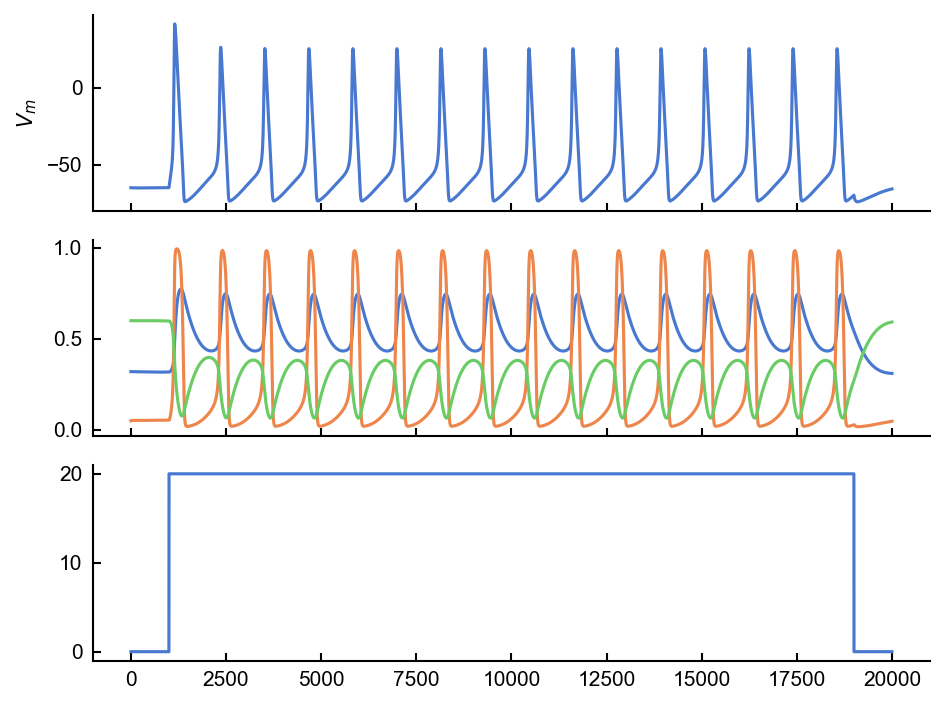

In [56]:
from pytoolsJS.plotting import load_style_sheet
load_style_sheet()

duration = 200
dt = 0.01
bins = int(duration / dt)
I = np.ones(bins) * 20
I[:1000] = 0
I[-1000:] = 0

output = simulate(I, dt)


def plot_things(output, I):
    fig, ax = plt.subplots(3, 1, sharex=True)
    ax[0].plot(output[0])
    ax[0].set_ylabel('$V_m$')
    ax[1].plot(output[1])
    ax[1].plot(output[2])
    ax[1].plot(output[3])

    ax[2].plot(I)
    plt.show()
    plt.close()
plot_things(output, I)

Now use the values you stored in arrays, make a plot of your simulation that shows the membrane voltage at each timepoint vs the potassium conductance at each timepoint. What shape does this have?

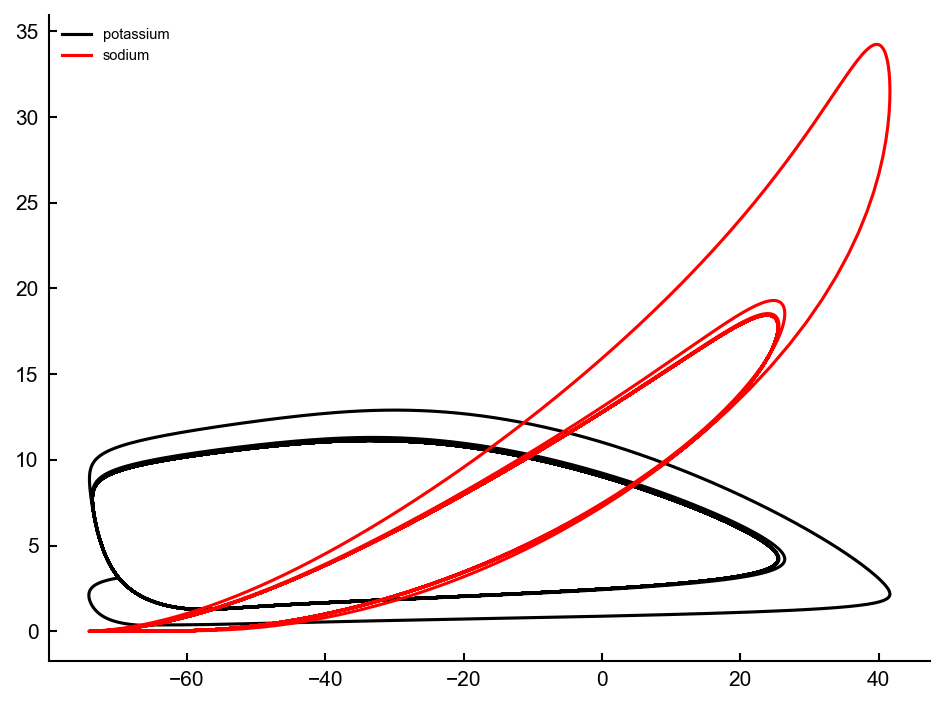

In [57]:
def plot_vm_vs_conductances(output):
    potassium_conductance = 36 * output[1] ** 4
    sodium_conductance = 120 * (output[2] ** 3) * output[3]
    plt.plot(output[0], potassium_conductance, c='black', label='potassium')
    plt.plot(output[0], sodium_conductance, c='r', label='sodium')
    plt.legend()
    plt.show()
    plt.close()

plot_vm_vs_conductances(output)

Repeat your simulation with several additional injected current values and create a new version of the plot above (voltage vs potassium conductance) for each simulation. What do you notice about these plots? What does each plot represent in terms of the neuron's activity? Do these plots help your understanding of why injecting current produces different firing rates in neurons? What else does this imply about neural firing rates?

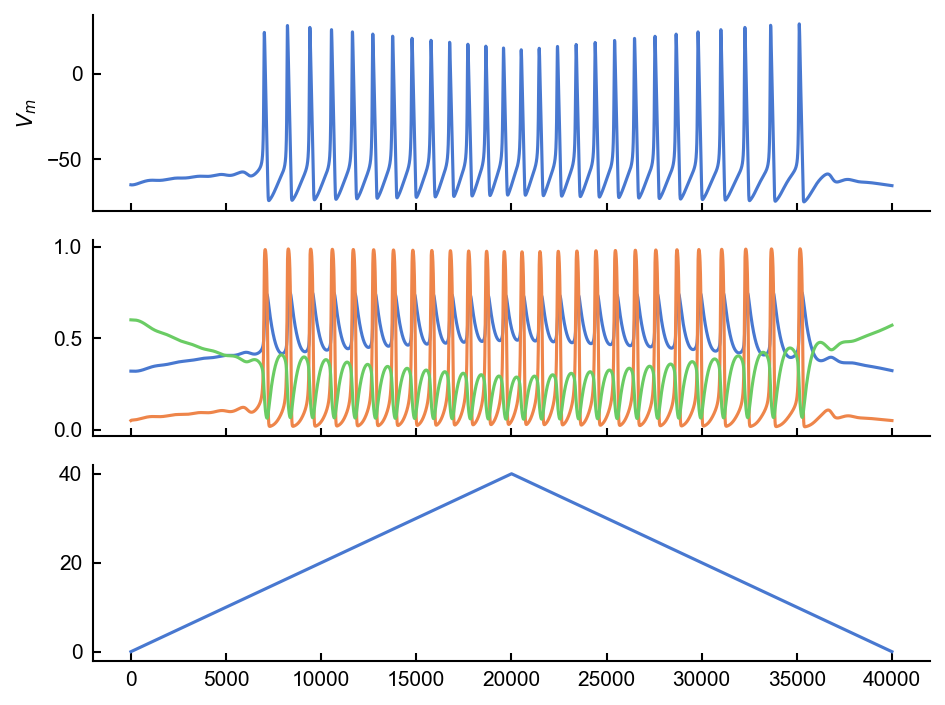

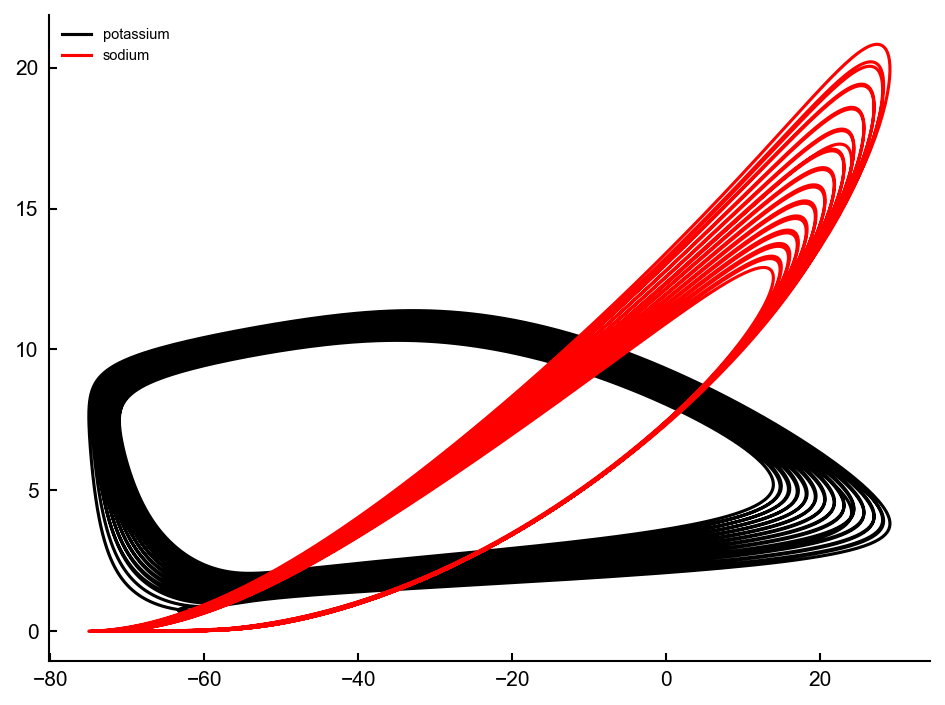

In [60]:
I = np.linspace(0, 40, 20000)
I = np.concatenate([I, I[::-1]])
output = simulate(I, dt)
plot_things(output, I)
plot_vm_vs_conductances(output)

This way of visualizing the state of a dynamical system is referred to as a "phase-space" diagram and it is essentially a function of your variable of interest over the variables that govern its evolution in time (or whatever it's changing in). Technically, we are not plotting the full phase space since voltage here depends on several different conductances. Using phase-space diagrams is a powerful way to gain intuition about a dynamical system and a lot of terminology has been developed around particular properties of phase-space diagram.

## Current Step
In this part, you will simulate an injected current pulse in order to validate your simulation.



Copy your function from above, rename it appropriately, and edit it to be able to handle a current step stimulus. That is, your function should accept a current startpoint and endpoint such that $I(t) = 0$ if $t < start$ or $t > end$, and $I(t) = I$ if $start \leq t \leq end$.


Using the function you just wrote, use Euler's method to numerically integrate with a current step stimulus $I(t) = 0$ for $t < 50ms, t > 150ms$ and $I(t) = 10 \mu A / cm^2$ for $50ms \leq t \leq 150ms$. Set $\bar{g}_{Na}$ and $\bar{g}_{K} = 0$. In a two-part figure plot the injected current and the simulated voltage.

## Conceptual
Recall the equivalent RC circuit corresponding to the Hodgkin Huxley model (see schematic below). Can you describe the flow of current through this circuit for three time periods: 0 ms < t < 50 ms, 50 ms < t < 150 ms, and 150 ms < t < 200 ms? Be sure to (1) specify the direction and magnitude* of current flow in each branch of the circuit for these time periods and (2) link your answers with the voltage plot you generated in 3.3. You may assume that the injected current was generated by transiently attaching a battery with voltage $E_{battery}$ > $E_l$.

*By magnitude we don't mean that you need to provide any numbers: a qualitive account of current is sufficient.


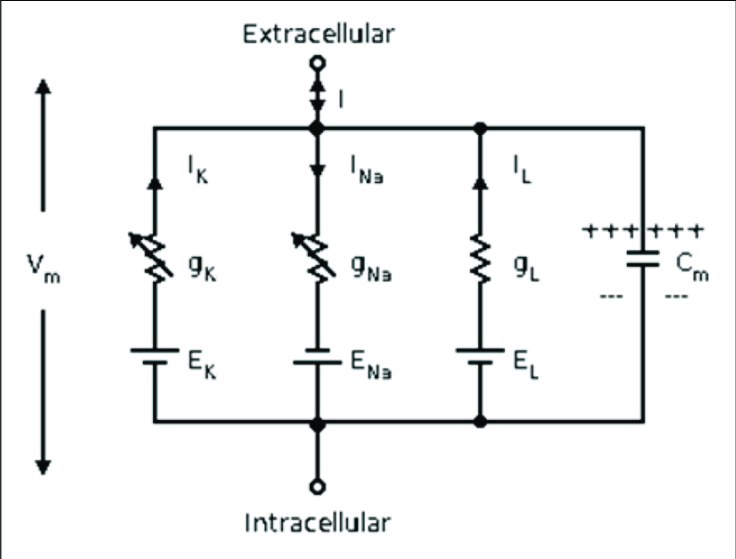


What is the main distinction between Hodgkin-Huxley type models and integrate-and-fire type models? What are the advantages of each type?




The first non-H-H conductance found was an inactivating K current. How would you add this  channel type to the model? What do you think would happen to the voltage response to an injected step of current? (Hint: read [the section on the conor-stevens model from Theoretical Neuroscience by Dayan and Abbott](https://drive.google.com/file/d/1aY7IJZtuxwr3nbd_VWUuFw2G4z3odCOx/view?usp=sharing)) code it up if you have the energy.


If you would like to see more on the HH model in depth and read more about how it fits into the larger context of neuroscience today, I recommend the online [neuronal dynamics](https://neuronaldynamics.epfl.ch/online/Ch2.html) textbook's section on it.